In [2]:
import pandas as pd
import torch
from tqdm.auto import tqdm
from transformers import AutoModelForSequenceClassification, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('data/sentiment_model/')
model = AutoModelForSequenceClassification.from_pretrained('data/sentiment_model/')

def predict(text):
    token = tokenizer(text, return_tensors='pt')
    with torch.no_grad():
        output = model(**token).logits
    return output.argmax().item() - 1



In [ ]:
df = pd.read_csv('res.csv')
contents = df['clean_data'].tolist()
labels = []
for i in tqdm(contents):
    labels.append(predict(str(i)))
df['sentiment'] = labels
df.to_csv('res_sentiment_2018.csv', index=False)
df.to_excel('res_sentiment_2018.xlsx', index=False)

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation


df = pd.read_csv('res_sentiment_2018.csv')
df.to_excel('res_sentiment_2018.xlsx', index=False)
neg_df = df[df['sentiment'] == -1]
neu_df = df[df['sentiment'] == 0]
pos_df = df[df['sentiment'] == 1]

def topic_analysis(df, n_components, top_n):
    contents = [' '.join(eval(i)) for i in df['tokens'].to_list()]
    tfidf = TfidfVectorizer(ngram_range=(1, 3))
    x = tfidf.fit_transform(contents)
    model = LatentDirichletAllocation(n_components=n_components, random_state=42)
    model.fit(x)
    featute_names = tfidf.get_feature_names()
    rows = []
    for topic in model.components_:
        topwords = [featute_names[i] for i in topic.argsort()[: -top_n - 1:-1]]
        rows.append(topwords)
    for idx, row in enumerate(rows):
        print(f'topic :{idx + 1}')
        print(row)

print('positive')
topic_analysis(pos_df, 10, 10)
print('neutrality')
topic_analysis(neu_df, 10, 10)
print('negtive')
topic_analysis(neg_df, 10, 10)

positive
topic :1
['china', 'chinese', 'one', 'love', 'us', 'good', 'years', 'happy', 'great', 'team']
topic :2
['new year', 'chinese new', 'new', 'chinese new year', 'happy chinese new', 'year', 'happy chinese', 'chinese', 'happy', 'china']
topic :3
['chinese', 'china', 'time', 'experience', 'congrats', 'pakistan', 'yx', 'bts', 'sh', 'world']
topic :4
['chinese', 'china', 'lay', 'new', 'president', 'best', 'music', 'food', 'xi', 'love']
topic :5
['china', 'chinese', 'thank', 'welcome china', 'welcome', 'love', 'korea', 'great', 'game', 'president']
topic :6
['china', 'chinese', 'thank china', 'thank', 'million', 'champs china', 'champs', 'us', 'world', 'please']
topic :7
['china', 'love', 'chinese', 'love china', 'day', 'year', 'happy', 'india', 'china love crazy', 'love crazy']
topic :8
['china', 'fans', 'fans china', 'year', 'india', 'chinese', 'xi', 'thanks fans china', 'thanks fans', 'thank']
topic :9
['china', 'chinese', 'guys', 'game china', 'game', 'see', 'lot', 'ever', 'said',

In [7]:
neg_df.to_excel('res_sentiment_2018_neg.xlsx', index=False)
neu_df.to_excel('res_sentiment_2018_neu.xlsx', index=False)
pos_df.to_excel('res_sentiment_2018_pos.xlsx', index=False)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation


df = pd.read_csv('res_sentiment_2018.csv')
df.to_excel('res_sentiment_2018.xlsx', index=False)

In [9]:
from collections import Counter

In [11]:
words = []
for i in df['tokens']:
    words.extend(eval(i))

In [13]:
words = Counter(words)

In [17]:
words = pd.DataFrame(words.items(), columns=['word', 'count'])

In [18]:
words.to_excel('words_count_2018.xlsx', index=False)

(-0.5, 14999.5, 11239.5, -0.5)

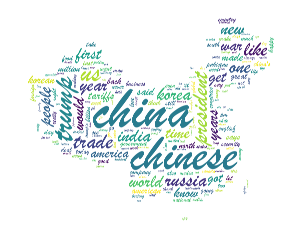

In [3]:
import jieba
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation


df = pd.read_csv('res_sentiment_2018.csv')
df.to_excel('res_sentiment_2018.xlsx', index=False)

from collections import Counter
words = []
for i in df['tokens']:
    words.extend(eval(i))
res_dic = Counter(words)
pic = Image.open('R-C.jpg')
pic = np.array(pic)
wd = WordCloud(font_path='C:\Windows\Fonts\STXINGKA.TTF', background_color='white', mask=pic, scale=20)
wd.generate_from_frequencies(res_dic)
plt.imshow(wd)
plt.axis('off')